In [1]:
import pandas as pd
import numpy as np
#import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

plt.style.use('ggplot')

%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
#import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.applications import Xception

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import tensorflow as tf
plt.style.use('ggplot')

%matplotlib inline

In [2]:
celeb_attr = pd.read_csv('/Users/rena/Desktop/Class/Gender-Prediction/Data/list_attr_celeba.csv')
celeb_align = pd.read_csv('/Users/rena/Desktop/Class/Gender-Prediction/Data/list_landmarks_align_celeba.csv')
celeb_partition = pd.read_csv('/Users/rena/Desktop/Class//Gender-Prediction/Data/list_eval_partition.csv')
celeb_box = pd.read_csv('/Users/rena/Desktop/Class/Gender-Prediction/Data/list_bbox_celeba.csv')

In [75]:
celeb_partition['partition'].unique()

array([0, 1, 2])

In [42]:
base_model = Xception( weights='imagenet', include_top=False)
# Top Model Block
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
# add yourtop layer block to your base model
model = Model(base_model.input, predictions)

In [6]:
val_path = "/Users/rena/Desktop/Class/Gender-Prediction/Images/Validation"
train_path = "/Users/rena/Desktop/Class/Gender-Prediction/Images/Train"
test_path = "/Users/rena/Desktop/Class/Gender-Prediction/Images/Test"
new_path =  "/Users/rena/Desktop/Class/Gender-Prediction/Images/New"

In [10]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5)
validation_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5, shuffle = False)
new_batches = ImageDataGenerator().flow_from_directory(new_path, target_size=(299, 299), classes=['Female', 'Male'])

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [26]:
test_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [45]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [46]:
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [47]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [48]:
model.fit(train_batches, validation_data = validation_batches, epochs = 8, verbose = 1, callbacks = [callback])

Epoch 1/8
20/20 [==============================] - 160s 8s/step - loss: 0.6775 - accuracy: 0.5018 - val_loss: 0.7160 - val_accuracy: 0.5172
Epoch 2/8
20/20 [==============================] - 133s 7s/step - loss: 0.6627 - accuracy: 0.5357 - val_loss: 0.6210 - val_accuracy: 0.7241
Epoch 3/8
20/20 [==============================] - 116s 6s/step - loss: 0.6459 - accuracy: 0.5441 - val_loss: 0.5929 - val_accuracy: 0.8621
Epoch 4/8
20/20 [==============================] - 125s 6s/step - loss: 0.6247 - accuracy: 0.6858 - val_loss: 0.5850 - val_accuracy: 0.8276
Epoch 5/8
20/20 [==============================] - 127s 6s/step - loss: 0.6155 - accuracy: 0.7272 - val_loss: 0.5762 - val_accuracy: 0.8276
Epoch 6/8
20/20 [==============================] - 128s 6s/step - loss: 0.6387 - accuracy: 0.6634 - val_loss: 0.5671 - val_accuracy: 0.8966
Epoch 7/8
20/20 [==============================] - 134s 7s/step - loss: 0.5968 - accuracy: 0.8048 - val_loss: 0.5599 - val_accuracy: 0.8966
Epoch 8/8
20/20 [===

In [49]:
model.save('Xception/Xception_model.h5')

In [50]:
Xception_Model = tf.keras.models.load_model('Xception/Xception_model.h5')

In [62]:
Xception_Model.evaluate(test_batches)

4/4 [==============================] - 11s 2s/step - loss: 0.5893 - accuracy: 0.8000


[0.58934485912323, 0.800000011920929]

In [52]:
predictions = Xception_Model.predict(test_batches,  verbose=0)

In [53]:
np.argmax(predictions, axis = 1)
#add more females

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [64]:
test_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [54]:
predictions
lst = []
for i in predictions:
  if np.argmax(i) > 0:
    lst.append('Male')
  else:
    lst.append('Female')
print(lst)

['Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male']


In [55]:
lst2 = []
def plots(ims, figsize=(24, 12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims - np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((1, 2, 3, 0))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            lst2.append(titles[i])
        plt.imshow(ims[i]/255, interpolation=None if interp else 'none')

/Users/rena/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


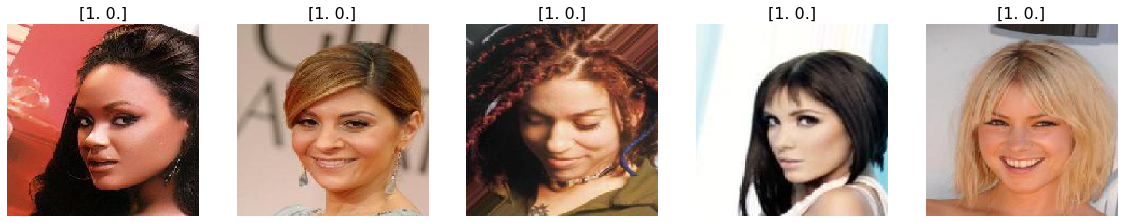

In [56]:
imgs, labels = next(test_batches)
images = plots(imgs, titles=labels)

In [57]:
lst_test = []
for i in lst2:
  if np.argmax(i) > 0:
    lst_test.append('Male')
  else:
    lst_test.append('Female')
print(lst_test)

['Female', 'Female', 'Female', 'Female', 'Female']


In [60]:
for predictions in zip(lst_test, lst):
  print(predictions)

('Female', 'Female')
('Female', 'Female')
('Female', 'Male')
('Female', 'Female')
('Female', 'Female')


In [76]:
import pandas as pd
import numpy as np
#import cv2    
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.metrics import f1_score

#from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential


from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import tensorflow as tf
plt.style.use('ggplot')

%matplotlib inline

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])
inputs = tf.keras.layers.Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
outputs = Xception( weights='imagenet', include_top=False)(x)
outputs = GlobalAveragePooling2D()(outputs)
outputs= Dense(2, activation='softmax')(outputs)
model = tf.keras.Model(inputs, outputs)


#base_model = Xception( weights='imagenet', include_top=False)
# Top Model Block
#x = base_model.output

# add yourtop layer block to your base model
#model = Model(base_model.input, predictions)

In [ ]:
val_path = "/root/Gender-Prediction/Images/Validation"
train_path = "/root/Gender-Prediction/Images/Train"
test_path = "/root/Gender-Prediction/Images/Test"
#300, 100, 50

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5)
validation_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(299, 299), classes=['Female', 'Male'], batch_size=5, shuffle = False)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model.fit(train_batches, validation_data = validation_batches, epochs = 8, verbose = 1, callbacks = [callback])

In [ ]:
model.save('Xception/Xception_model_data_aug.h5')

In [ ]:
Xception_Model = tf.keras.models.load_model('Xception/Xception_model.h5')

In [ ]:
Xception_Model.evaluate(test_batches)

In [ ]:
predictions = Xception_Model.predict(test_batches,  verbose=0)

In [ ]:
np.argmax(predictions, axis = 1)

In [ ]:
test_batches.labels